<a href="https://colab.research.google.com/github/Dhruv-Rathore/Airbnb_EDA/blob/main/Capstone_EDA_Airbnb_Dhruv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

In [4]:
def outlier_treatment(z):
    '''
    Function for capping outliers
    '''
    
    q1 = np.percentile(z, 25)
    q3 = np.percentile(z, 75)
    IQR = q3 - q1


    lower_range = q1 - 1.5 * IQR
    upper_range = q3 + 1.5 * IQR


    z = np.where(z >upper_range, upper_range,z)
    z = np.where(z <lower_range, lower_range,z)
    return z

In [5]:
df['new_price'] = df.groupby(["neighbourhood", "room_type"])['price'].transform(lambda x: outlier_treatment(x))

In [6]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,103.5
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,142.5
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,70.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,40.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,115.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,55.0


In [16]:
correlation = df[['reviews_per_month', 'room_type', 'neighbourhood_group', 'neighbourhood', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

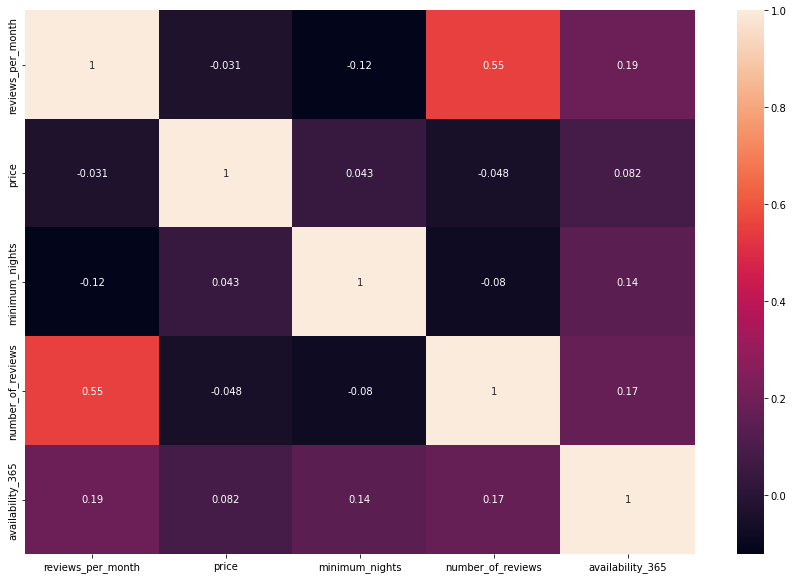

In [20]:

plt.figure(figsize=(15, 10))
sns.heatmap(correlation.corr(), annot=True)

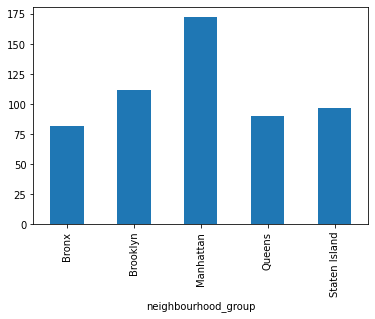

In [7]:
df.groupby('neighbourhood_group')['new_price'].mean().plot(kind = 'bar')